In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [4]:
samples = 1000
data = [1e-2*float(i) for i in range (-samples, samples)]
label = [1 if i >3.14 else 0 for i in range (-samples, samples)]

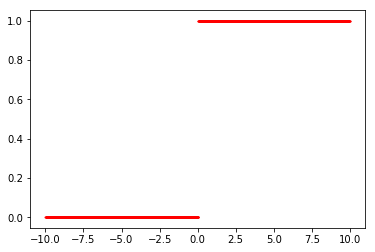

In [5]:
plt.scatter(data, label,1,'r')

In [15]:
x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

w = tf.Variable(0.0, dtype = tf.float32)
b = tf.Variable(0.0, dtype = tf.float32)
y =w*x+b

In [16]:
loss = tf.losses.sigmoid_cross_entropy(y_,y) 

In [24]:
train_op = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)
train_op


<tf.Operation 'GradientDescent_5' type=NoOp>

In [18]:
init = tf.global_variables_initializer()

step:0, loss:0.6931459307670593
step:100, loss:0.13942132890224457
step:200, loss:0.10745799541473389
step:300, loss:0.09289433062076569
step:400, loss:0.0839526578783989
step:500, loss:0.07768644392490387
step:600, loss:0.07295096665620804
step:700, loss:0.06919293105602264
step:800, loss:0.06610629707574844
step:900, loss:0.06350595504045486
step:1000, loss:0.061271924525499344
step:1100, loss:0.059322476387023926
step:1200, loss:0.05759963393211365
step:1300, loss:0.056061044335365295
step:1400, loss:0.05467473343014717
step:1500, loss:0.053416136652231216
step:1600, loss:0.05226598680019379
step:1700, loss:0.051208920776844025
step:1800, loss:0.05023253709077835
step:1900, loss:0.0493265800178051
step:2000, loss:0.04848265275359154
step:2100, loss:0.04769366979598999
step:2200, loss:0.04695364832878113
step:2300, loss:0.04625752940773964
step:2400, loss:0.04560094699263573
step:2500, loss:0.044980116188526154
step:2600, loss:0.044391755014657974
step:2700, loss:0.04383303225040436


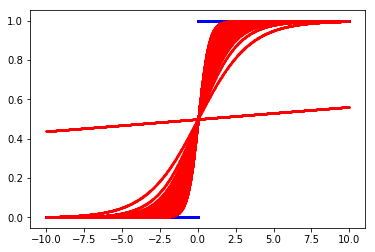

In [21]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        _,_loss = sess.run([train_op, loss], feed_dict = {x:data,y_:label})
        if i % 100 ==0:
            _pred =sess.run(tf.nn.sigmoid(y), {x:data})## y 에 대해서는 맵핑하면 안됨
            plt.scatter(data,label,1,'b')
            plt.scatter(data,_pred,1,'r')
            print('step:{}, loss:{}'.format(i,_loss))


In [ ]:
## 강사님 답
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

samples = 1000
data = [1e-2*float(i) for i in range(-samples, samples)]
label = [1 if i>3.14 else 0 for i in range(-samples, samples)]
plt.scatter(data, label, 1, 'r')

x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

w = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

y = w*x + b

loss = tf.losses.sigmoid_cross_entropy(y_, y) ## loss 함수를 sigmoid cross entropy로 설정 
train_op = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(10000):
        _, _loss = sess.run([train_op, loss], {x: data, y_: label})
        if i%100 == 0:
            _pred = sess.run(tf.nn.sigmoid(y), {x: data})
            plt.scatter(data, label, 1, 'b')
            plt.scatter(data, _pred, 1, 'r')
            print('step: {}, loss: {}'.format(i, _loss))

step: 0, loss: 0.6931459307670593, w:0.024999694898724556,b:-1.9999994037789293e-05
step: 100, loss: 0.13942119479179382, w:0.590297520160675,b:-0.001701458590105176
step: 200, loss: 0.10745786875486374, w:0.7664674520492554,b:-0.0032725196797400713
step: 300, loss: 0.09289419651031494, w:0.8864557147026062,b:-0.004780692048370838
step: 400, loss: 0.08395255357027054, w:0.9807012677192688,b:-0.006236686836928129
step: 500, loss: 0.07768633961677551, w:1.0596767663955688,b:-0.007647156715393066
step: 600, loss: 0.07295085489749908, w:1.1283677816390991,b:-0.00901687704026699
step: 700, loss: 0.06919281929731369, w:1.189578652381897,b:-0.01034954097121954
step: 800, loss: 0.06610620021820068, w:1.245063066482544,b:-0.011648115701973438
step: 900, loss: 0.06350584328174591, w:1.2959966659545898,b:-0.012915078550577164
step: 1000, loss: 0.06127181276679039, w:1.343210220336914,b:-0.01415253710001707
step: 1100, loss: 0.059322357177734375, w:1.387317419052124,b:-0.015362297184765339
step: 1

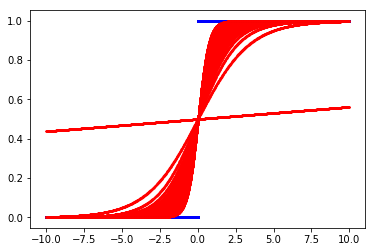

In [23]:
## log loss

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

samples = 1000
data = [1e-2*float(i) for i in range(-samples, samples)] ## x 가 될값들 
label = [1 if i>3.14 else 0 for i in range(-samples, samples)] ## y 가 될값들 
plt.scatter(data, label, 1, 'r') ## 시그모이드 함수 그래프 

x = tf.placeholder(tf.float32) ## x 에 대해지정
y_ = tf.placeholder(tf.float32) ## y 에 대해 지정
 
w = tf.Variable(0.0, dtype=tf.float32) ## 0.0부터 시작하여 target w 로 업데이트 함 
b = tf.Variable(0.0, dtype=tf.float32) ## 0.0부터 시작하여 target b 를찾아감

y = tf.nn.sigmoid(w*x + b)

loss = tf.losses.log_loss(y_, y) ## 실제값과 예측지의 코스트 함수 logloss 사용 
train_op = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)## optimizer 함수 
## learning rate는 1e-2 = 0.01
init = tf.global_variables_initializer() ## variables 에대하여 초기값을 정해줌 

with tf.Session() as sess:
    sess.run(init) ## session을 돌림 
    for i in range(10000):
        _, _loss,_w,_b = sess.run([train_op, loss,w, b], {x: data, y_: label})## mapping 
        ## _loss,_w,_b 은 업데이트된 값들 
        if i%100 == 0:
            _pred = sess.run(y, {x: data})
            plt.scatter(data, label, 1, 'b')
            plt.scatter(data, _pred, 1, 'r')
            print('step: {}, loss: {}, w:{},b:{}'.format(i, _loss,_w,_b))